In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
import os, re
import cv2
import glob

import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow import keras

from PIL import Image
import keras_ocr
import pytesseract
from pytesseract import Output

from matplotlib import rc
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

# 1. Project_OCR

## (1) Google OCR API

In [2]:
def detect_text(path):
    """Detects text in the file."""
    from google.cloud import vision
    import io
    client = vision.ImageAnnotatorClient()

    with io.open(path, 'rb') as image_file:
        content = image_file.read()
        
    image = vision.Image(content=content)

    response = client.text_detection(image=image)
    texts = response.text_annotations
    print('Texts:')

    for text in texts:
       print('\n"{}"'.format(text.description))

    vertices = (['({},{})'.format(vertex.x, vertex.y)
                 for vertex in text.bounding_poly.vertices])

    print('bounds: {}'.format(','.join(vertices)))

    if response.error.message:
        raise Exception(
            '{}\nFor more info on error messages, check: '
            'https://cloud.google.com/apis/design/errors'.format(
                response.error.message))

findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans.


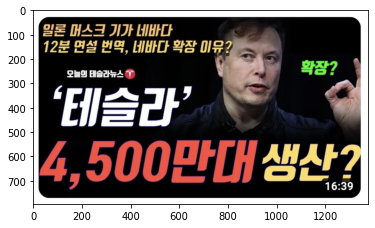

/opt/conda/lib/python3.9/site-packages/pkg_resources/__init__.py:122: PkgResourcesDeprecationWarning: 0.996-ko-0.9.2 is an invalid version and will not be supported in a future release
  warnings.warn(


Texts:

"일론 머스크 기가 네바다
12분 연설 번역, 네바다 확장 이유?
오늘의 테슬라뉴스T
'테슬라'
확장?
4,500만대 생산?
16:39"

"일론"

"머스크"

"기가"

"네바다"

"12"

"분"

"연설"

"번역"

","

"네바다"

"확장"

"이유"

"?"

"오늘"

"의"

"테슬라"

"뉴스"

"T"

"'"

"테슬라"

"'"

"확장"

"?"

"4,500"

"만대"

"생산"

"?"

"16:39"
bounds: (1200,706),(1314,706),(1314,736),(1200,736)


In [3]:
img_path = os.getenv('HOME')+'/aiffel/ocr_python/image/ocr_1.jpeg'  
img_orig = cv2.imread(img_path) 
plt.imshow(cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB))
plt.show()

os.environ["GOOGLE_APPLICATION_CREDENTIALS"] =  os.getenv('HOME')+'/aiffel/ocr_python/my_google_api_key.json'
path = os.getenv('HOME')+'/aiffel/ocr_python/image/ocr_1.jpeg'  
detect_text(path)

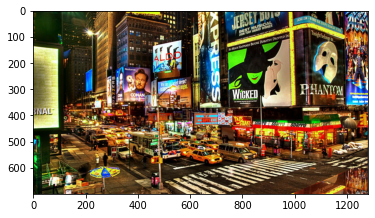

Texts:

"11
1
T
RNAL
49 St S
Downtow
M
tion
150
9
SABRECT
CARRETT
Nocturnal.
CONAN
WE
ALDO
LARGE
wit
Why they never sleeps?
BEDR
all night.
at ridin
and
Maryland
GIFTS GIFTS
#7 193
D
Naturpre
PAARTON
XPRESS
TGIFTS
JERSEY
BEST MUSICAL
2006 TONY AWARD WINNER
AUGUST WILSON THEATRE, 245 WEST 52 STREET
SO MUCH HAPPENED BEFORE DOROTHY DROPPED IN
CAPE TOWN'T
CAPE
6
WICKED
O
THE UNTOLD SORT OF THE WITCHES OF
WadableMed.com
STREET
TARS
CAPS
TASTEASE TAIS
18
T A
LACAGE CONCEP
Tonight belongs to...
PHANTOM
EXT
city outdoor
TADS
STEAKS SUENTO Sbarro Sbarro Sbarro Scarro Stanto
$50
FREE
PAGA
Tui&us pepouse to
1"

"11"

"1"

"T"

"RNAL"

"49"

"St"

"S"

"Downtow"

"M"

"tion"

"150"

"9"

"SABRECT"

"CARRETT"

"Nocturnal"

"."

"CONAN"

"WE"

"ALDO"

"LARGE"

"wit"

"Why"

"they"

"never"

"sleeps"

"?"

"BEDR"

"all"

"night"

"."

"at"

"ridin"

"and"

"Maryland"

"GIFTS"

"GIFTS"

"#"

"7"

"193"

"D"

"Naturpre"

"PAARTON"

"XPRESS"

"TGIFTS"

"JERSEY"

"BEST"

"MUSICAL"

"2006"

"TONY"

"AWARD

In [4]:
img_path = os.getenv('HOME')+'/aiffel/ocr_python/image/ocr_2.jpg'  
img_orig = cv2.imread(img_path) 
plt.imshow(cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB))
plt.show()

os.environ["GOOGLE_APPLICATION_CREDENTIALS"] =  os.getenv('HOME')+'/aiffel/ocr_python/my_google_api_key.json'
path = os.getenv('HOME')+'/aiffel/ocr_python/image/ocr_2.jpg'  
detect_text(path)

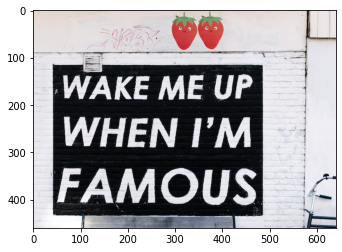

Texts:

"WAKE ME UP
WHEN I'M
FAMOUS"

"WAKE"

"ME"

"UP"

"WHEN"

"I'M"

"FAMOUS"
bounds: (50,329),(472,336),(471,409),(49,402)


In [5]:
img_path = os.getenv('HOME')+'/aiffel/ocr_python/image/ocr_3.jpeg'  
img_orig = cv2.imread(img_path) 
plt.imshow(cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB))
plt.show()

os.environ["GOOGLE_APPLICATION_CREDENTIALS"] =  os.getenv('HOME')+'/aiffel/ocr_python/my_google_api_key.json'
path = os.getenv('HOME')+'/aiffel/ocr_python/image/ocr_3.jpeg'  
detect_text(path)

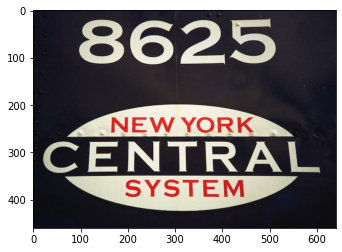

Texts:

"8625
NEW YORK
CENTRAL
SYSTEM"

"8625"

"NEW"

"YORK"

"CENTRAL"

"SYSTEM"
bounds: (194,358),(441,358),(441,392),(194,392)


In [6]:
img_path = os.getenv('HOME')+'/aiffel/ocr_python/image/ocr_4.jpeg'  
img_orig = cv2.imread(img_path)
plt.imshow(cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB))
plt.show()

os.environ["GOOGLE_APPLICATION_CREDENTIALS"] =  os.getenv('HOME')+'/aiffel/ocr_python/my_google_api_key.json'
path = os.getenv('HOME')+'/aiffel/ocr_python/image/ocr_4.jpeg'  
detect_text(path)

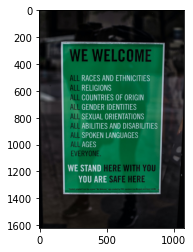

Texts:

"WE WELCOME
ALL RACES AND ETHNICITIES
ALL RELIGIONS
ALL COUNTRIES OF ORIGIN
ALL GENDER IDENTITIES
ALL SEXUAL ORIENTATIONS
ALL ABILITIES AND DISABILITIES
ALL SPOKEN LANGUAGES
ALL AGES
EVERYONE.
WE STAND HERE WITH YOU
YOU ARE SAFE HERE
* Content adapted from the original "We Welcome" sign created by IPRC members Lisa Mangum and Jason Levian"

"WE"

"WELCOME"

"ALL"

"RACES"

"AND"

"ETHNICITIES"

"ALL"

"RELIGIONS"

"ALL"

"COUNTRIES"

"OF"

"ORIGIN"

"ALL"

"GENDER"

"IDENTITIES"

"ALL"

"SEXUAL"

"ORIENTATIONS"

"ALL"

"ABILITIES"

"AND"

"DISABILITIES"

"ALL"

"SPOKEN"

"LANGUAGES"

"ALL"

"AGES"

"EVERYONE"

"."

"WE"

"STAND"

"HERE"

"WITH"

"YOU"

"YOU"

"ARE"

"SAFE"

"HERE"

"*"

"Content"

"adapted"

"from"

"the"

"original"

"""

"We"

"Welcome"

"""

"sign"

"created"

"by"

"IPRC"

"members"

"Lisa"

"Mangum"

"and"

"Jason"

"Levian"
bounds: (833,1325),(868,1325),(868,1339),(833,1339)


In [7]:
img_path = os.getenv('HOME')+'/aiffel/ocr_python/image/ocr_5.jpeg'  
img_orig = cv2.imread(img_path)
plt.imshow(cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB))
plt.show()

os.environ["GOOGLE_APPLICATION_CREDENTIALS"] =  os.getenv('HOME')+'/aiffel/ocr_python/my_google_api_key.json'
path = os.getenv('HOME')+'/aiffel/ocr_python/image/ocr_5.jpeg'  
detect_text(path)

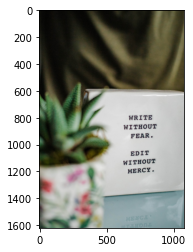

Texts:

"WRITE
WITHOUT
FEAR.
EDIT
WITHOUT
MERCY.
NEBCA"

"WRITE"

"WITHOUT"

"FEAR"

"."

"EDIT"

"WITHOUT"

"MERCY"

"."

"NEBCA"
bounds: (646,1537),(806,1522),(809,1553),(649,1569)


In [8]:
img_path = os.getenv('HOME')+'/aiffel/ocr_python/image/ocr_6.jpeg'  
img_orig = cv2.imread(img_path)
plt.imshow(cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB))
plt.show()

os.environ["GOOGLE_APPLICATION_CREDENTIALS"] =  os.getenv('HOME')+'/aiffel/ocr_python/my_google_api_key.json'
path = os.getenv('HOME')+'/aiffel/ocr_python/image/ocr_6.jpeg'  
detect_text(path)

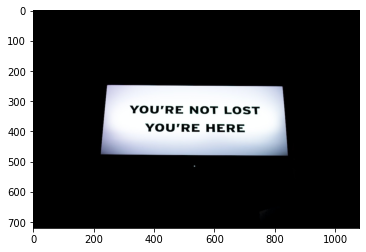

Texts:

"YOU'RE NOT LOST
YOU'RE HERE"

"YOU'RE"

"NOT"

"LOST"

"YOU'RE"

"HERE"
bounds: (570,374),(698,375),(698,402),(570,401)


In [9]:
img_path = os.getenv('HOME')+'/aiffel/ocr_python/image/ocr_7.jpeg'  
img_orig = cv2.imread(img_path)
plt.imshow(cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB))
plt.show()

os.environ["GOOGLE_APPLICATION_CREDENTIALS"] =  os.getenv('HOME')+'/aiffel/ocr_python/my_google_api_key.json'
path = os.getenv('HOME')+'/aiffel/ocr_python/image/ocr_7.jpeg'  
detect_text(path)

## (2) Keras OCR

In [10]:
pipeline = keras_ocr.pipeline.Pipeline()

Looking for /aiffel/.keras-ocr/craft_mlt_25k.h5
Looking for /aiffel/.keras-ocr/crnn_kurapan.h5


In [11]:
image_urls = [
  os.getenv('HOME')+'/aiffel/ocr_python/image/ocr_2.jpg',
  os.getenv('HOME')+'/aiffel/ocr_python/image/ocr_3.jpeg',
  os.getenv('HOME')+'/aiffel/ocr_python/image/ocr_4.jpeg',
  os.getenv('HOME')+'/aiffel/ocr_python/image/ocr_5.jpeg',
  os.getenv('HOME')+'/aiffel/ocr_python/image/ocr_6.jpeg',
  os.getenv('HOME')+'/aiffel/ocr_python/image/ocr_7.jpeg'
]

images = [keras_ocr.tools.read(url) for url in image_urls]
prediction_groups = [pipeline.recognize([url]) for url in image_urls]

findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans.


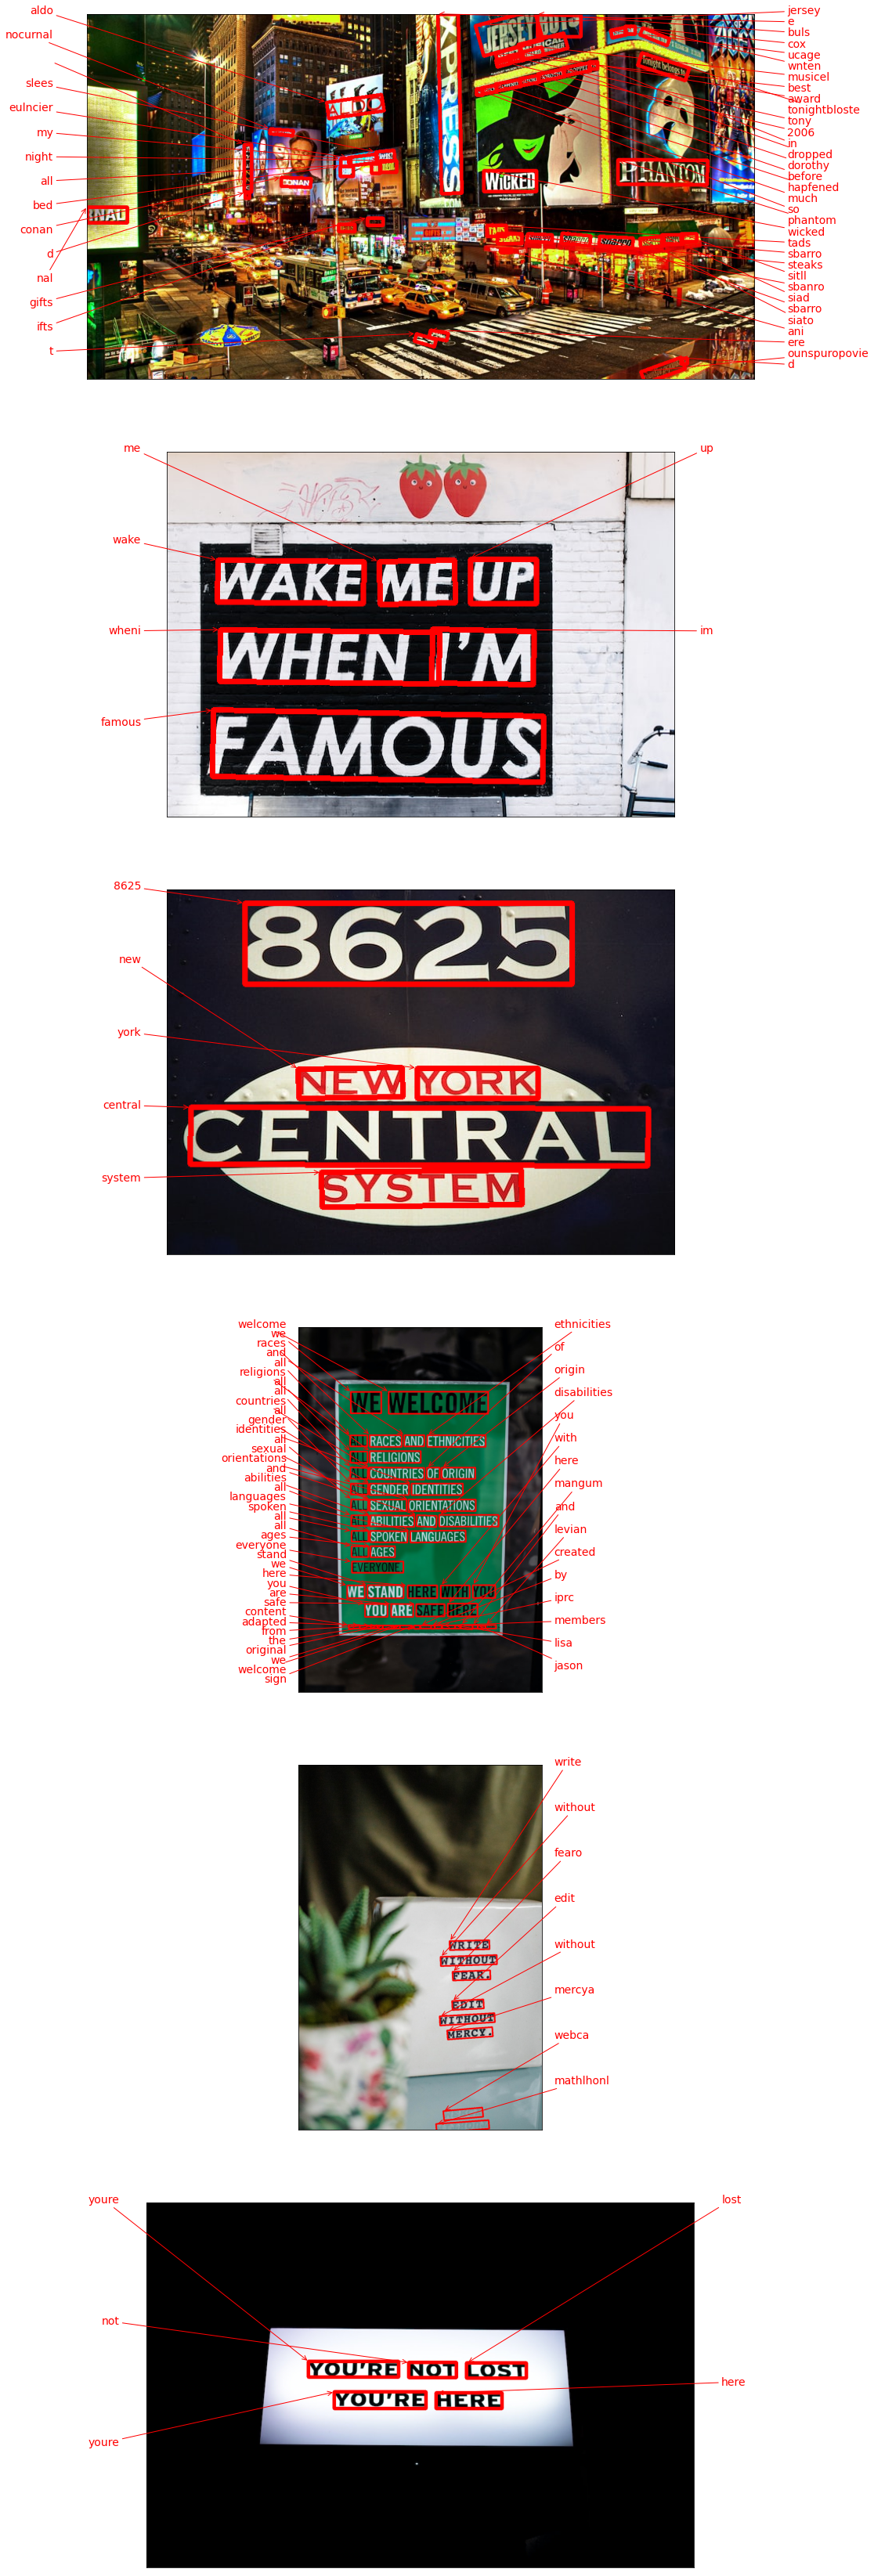

In [12]:
fig, axs = plt.subplots(nrows=len(images), figsize=(20, 60))
for idx, ax in enumerate(axs):
    keras_ocr.tools.drawAnnotations(image=images[idx], 
                                    predictions=prediction_groups[idx][0], ax=ax)

## (3) Tesseract OCR

In [13]:
def crop_word_regions(image_path='./images/sample.png', output_path='./output'):
    if not os.path.exists(output_path):
        os.mkdir(output_path)
    custom_oem_psm_config = r'--oem 3 --psm 3'
    image = Image.open(image_path)

    recognized_data = pytesseract.image_to_data(
        image, lang='eng',
        config=custom_oem_psm_config,
        output_type=Output.DICT
    )
    
    top_level = max(recognized_data['level'])
    index = 0
    cropped_image_path_list = []
    for i in range(len(recognized_data['level'])):
        level = recognized_data['level'][i]
    
        if level == top_level:
            left = recognized_data['left'][i]
            top = recognized_data['top'][i]
            width = recognized_data['width'][i]
            height = recognized_data['height'][i]
            
            output_img_path = os.path.join(output_path, f"{str(index).zfill(4)}.png")
            print(output_img_path)
            cropped_image = image.crop((
                left,
                top,
                left+width,
                top+height
            ))
            cropped_image.save(output_img_path)
            cropped_image_path_list.append(output_img_path)
            index += 1
    return cropped_image_path_list

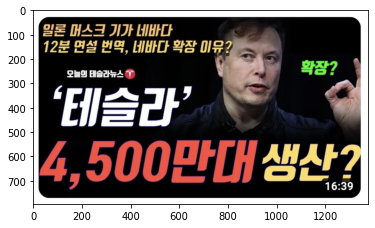

/aiffel/aiffel/ocr_python/image/0000.png
/aiffel/aiffel/ocr_python/image/0001.png
/aiffel/aiffel/ocr_python/image/0002.png
/aiffel/aiffel/ocr_python/image/0003.png
/aiffel/aiffel/ocr_python/image/0004.png
/aiffel/aiffel/ocr_python/image/0005.png
/aiffel/aiffel/ocr_python/image/0006.png
/aiffel/aiffel/ocr_python/image/0007.png
/aiffel/aiffel/ocr_python/image/0008.png
/aiffel/aiffel/ocr_python/image/0009.png
/aiffel/aiffel/ocr_python/image/0010.png
/aiffel/aiffel/ocr_python/image/0011.png
/aiffel/aiffel/ocr_python/image/0012.png
/aiffel/aiffel/ocr_python/image/0013.png
/aiffel/aiffel/ocr_python/image/0014.png


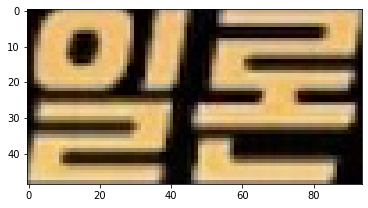

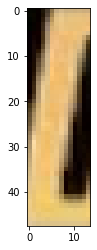

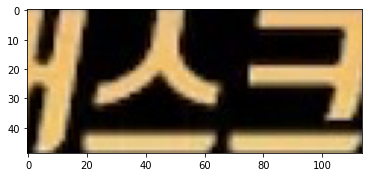

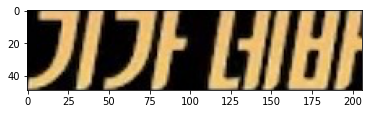

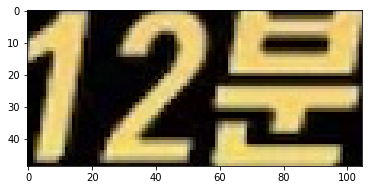

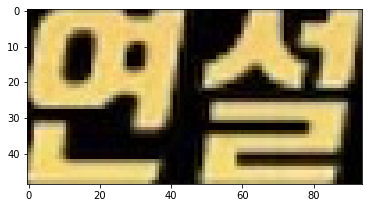

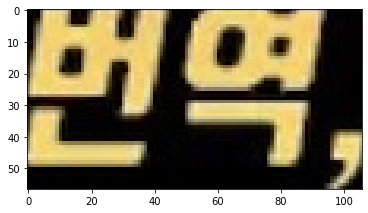

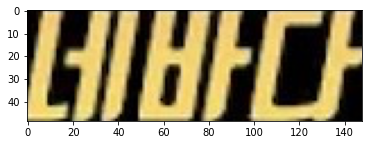

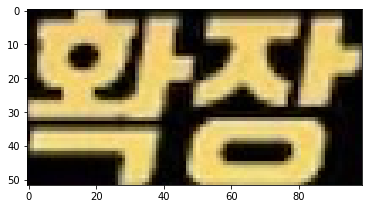

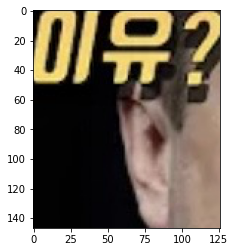

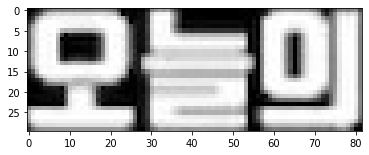

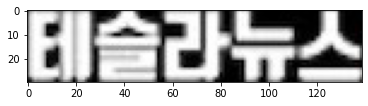

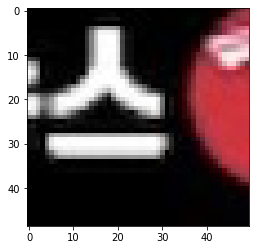

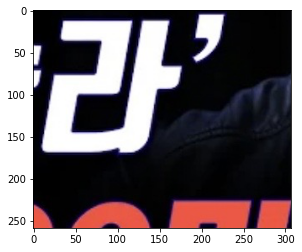

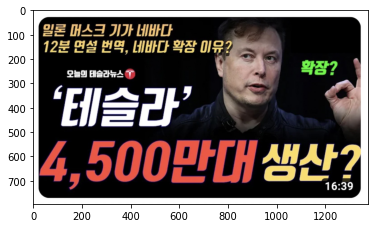

In [14]:
work_dir = os.getenv('HOME')+'/aiffel/ocr_python/image'
img_file_path = work_dir + '/ocr_1.jpeg'
img_bgr = cv2.imread(img_file_path)
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()
cropped_image_path_list = crop_word_regions(img_file_path, work_dir)

# 테서랙트로 잘린 이미지에서 단어 인식하기
def recognize_images(cropped_image_path_list):
    custom_oem_psm_config = r'--oem 3 --psm 7'
    for image_path in cropped_image_path_list:
        image = Image.open(image_path)
        recognized_data = pytesseract.image_to_string(
            image, lang='kor', 
            config=custom_oem_psm_config,
            output_type=Output.DICT)
        img_bgr = cv2.imread(image_path)
        img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
        plt.imshow(img_rgb)
        plt.show()
recognize_images(cropped_image_path_list)

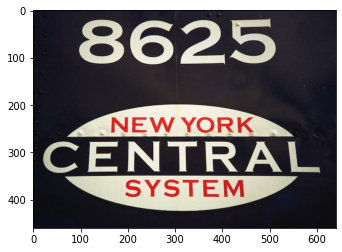

/aiffel/aiffel/ocr_python/image/0000.png
/aiffel/aiffel/ocr_python/image/0001.png
/aiffel/aiffel/ocr_python/image/0002.png
/aiffel/aiffel/ocr_python/image/0003.png
/aiffel/aiffel/ocr_python/image/0004.png
/aiffel/aiffel/ocr_python/image/0005.png
/aiffel/aiffel/ocr_python/image/0006.png


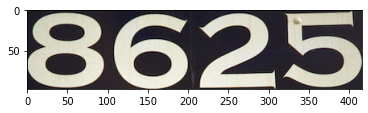

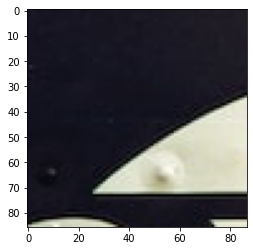

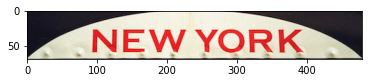

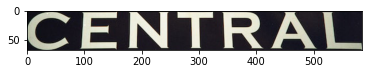

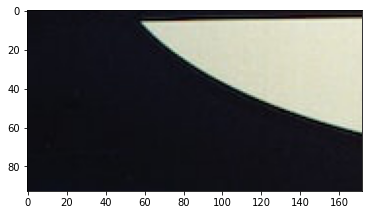

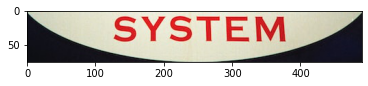

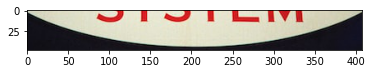

In [17]:
work_dir = os.getenv('HOME')+'/aiffel/ocr_python/image'
img_file_path = work_dir + '/ocr_4.jpeg'
img_bgr = cv2.imread(img_file_path)
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()
cropped_image_path_list = crop_word_regions(img_file_path, work_dir)

def recognize_images(cropped_image_path_list):
    custom_oem_psm_config = r'--oem 3 --psm 7'
    for image_path in cropped_image_path_list:
        image = Image.open(image_path)
        recognized_data = pytesseract.image_to_string(
            image, lang='eng', 
            config=custom_oem_psm_config,
            output_type=Output.DICT)
        img_bgr = cv2.imread(image_path)
        img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
        plt.imshow(img_rgb)
        plt.show()
recognize_images(cropped_image_path_list)

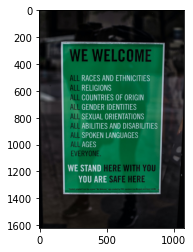

/aiffel/aiffel/ocr_python/image/0000.png
/aiffel/aiffel/ocr_python/image/0001.png
/aiffel/aiffel/ocr_python/image/0002.png
/aiffel/aiffel/ocr_python/image/0003.png
/aiffel/aiffel/ocr_python/image/0004.png
/aiffel/aiffel/ocr_python/image/0005.png
/aiffel/aiffel/ocr_python/image/0006.png
/aiffel/aiffel/ocr_python/image/0007.png
/aiffel/aiffel/ocr_python/image/0008.png
/aiffel/aiffel/ocr_python/image/0009.png
/aiffel/aiffel/ocr_python/image/0010.png
/aiffel/aiffel/ocr_python/image/0011.png
/aiffel/aiffel/ocr_python/image/0012.png
/aiffel/aiffel/ocr_python/image/0013.png
/aiffel/aiffel/ocr_python/image/0014.png
/aiffel/aiffel/ocr_python/image/0015.png
/aiffel/aiffel/ocr_python/image/0016.png
/aiffel/aiffel/ocr_python/image/0017.png
/aiffel/aiffel/ocr_python/image/0018.png
/aiffel/aiffel/ocr_python/image/0019.png
/aiffel/aiffel/ocr_python/image/0020.png
/aiffel/aiffel/ocr_python/image/0021.png
/aiffel/aiffel/ocr_python/image/0022.png
/aiffel/aiffel/ocr_python/image/0023.png
/aiffel/aiffel/o

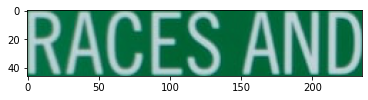

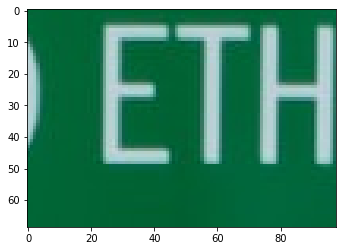

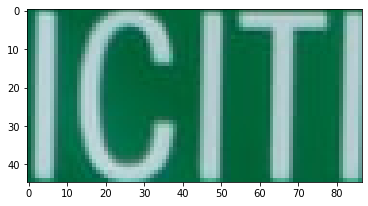

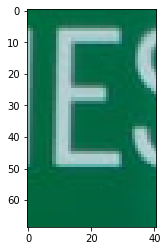

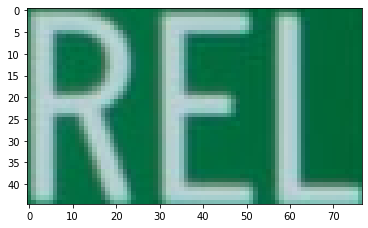

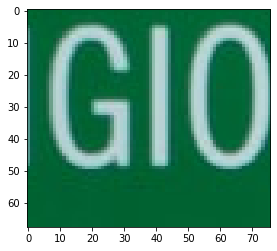

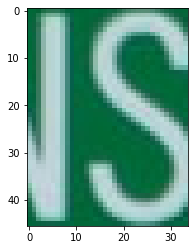

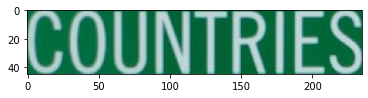

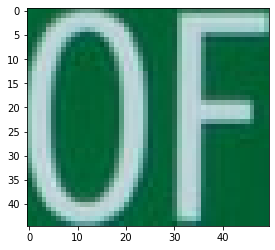

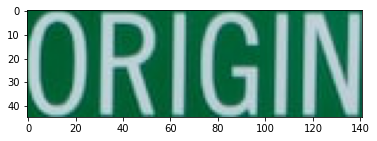

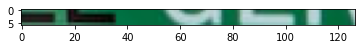

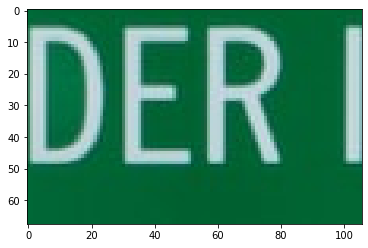

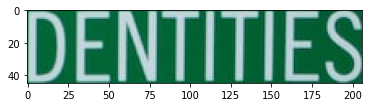

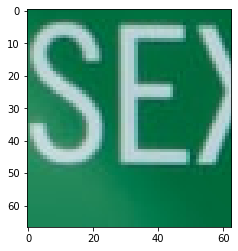

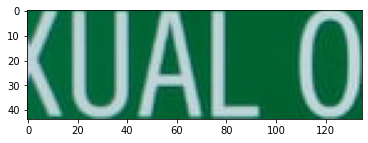

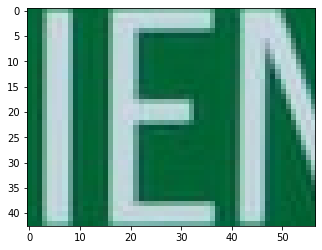

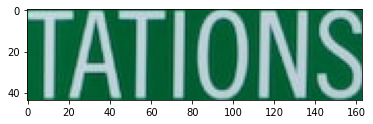

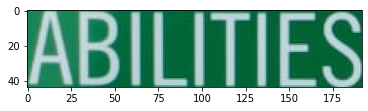

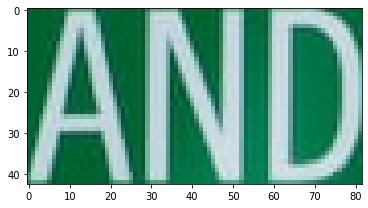

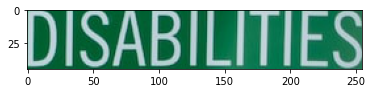

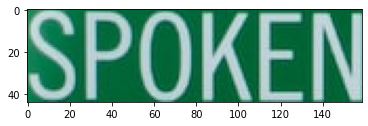

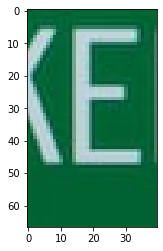

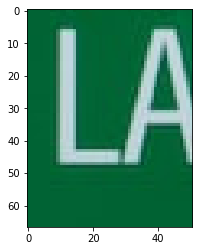

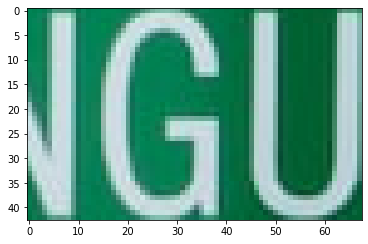

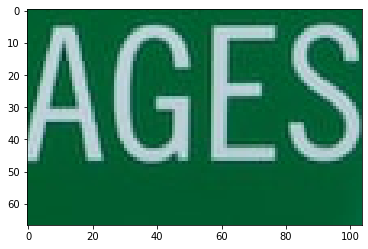

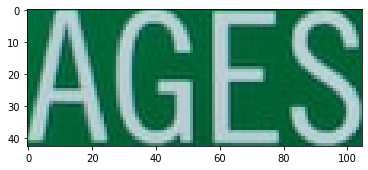

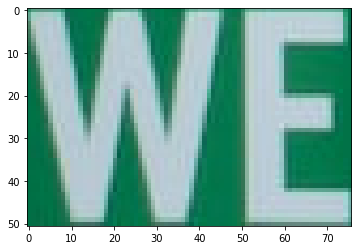

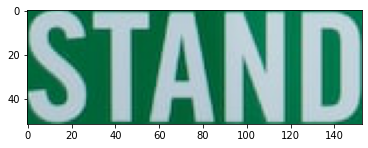

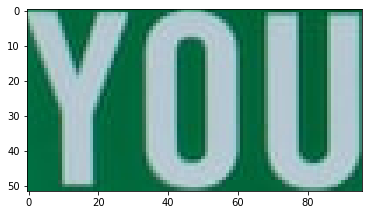

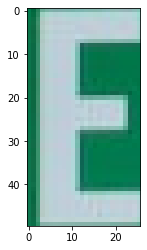

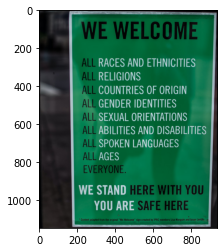

In [18]:
work_dir = os.getenv('HOME')+'/aiffel/ocr_python/image'
img_file_path = work_dir + '/ocr_5.jpeg'
img_bgr = cv2.imread(img_file_path)
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()
cropped_image_path_list = crop_word_regions(img_file_path, work_dir)

def recognize_images(cropped_image_path_list):
    custom_oem_psm_config = r'--oem 3 --psm 7'  
    for image_path in cropped_image_path_list:
        image = Image.open(image_path)
        recognized_data = pytesseract.image_to_string(
            image, lang='eng', 
            config=custom_oem_psm_config,
            output_type=Output.DICT)
        img_bgr = cv2.imread(image_path)
        img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
        plt.imshow(img_rgb)
        plt.show()
recognize_images(cropped_image_path_list)

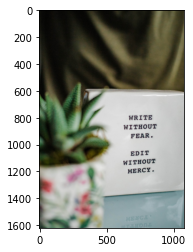

/aiffel/aiffel/ocr_python/image/0000.png
/aiffel/aiffel/ocr_python/image/0001.png
/aiffel/aiffel/ocr_python/image/0002.png
/aiffel/aiffel/ocr_python/image/0003.png
/aiffel/aiffel/ocr_python/image/0004.png
/aiffel/aiffel/ocr_python/image/0005.png
/aiffel/aiffel/ocr_python/image/0006.png


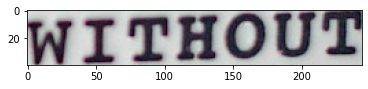

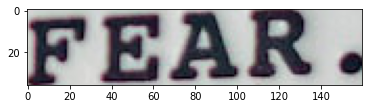

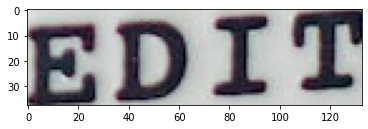

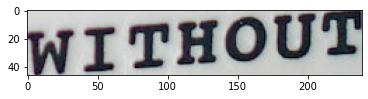

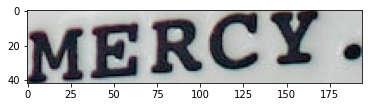

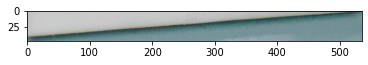

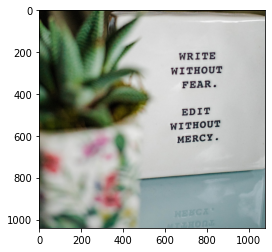

In [19]:
work_dir = os.getenv('HOME')+'/aiffel/ocr_python/image'
img_file_path = work_dir + '/ocr_6.jpeg'
img_bgr = cv2.imread(img_file_path)
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()
cropped_image_path_list = crop_word_regions(img_file_path, work_dir)

def recognize_images(cropped_image_path_list):
    custom_oem_psm_config = r'--oem 3 --psm 7'
    for image_path in cropped_image_path_list:
        image = Image.open(image_path)
        recognized_data = pytesseract.image_to_string(
            image, lang='eng', 
            config=custom_oem_psm_config,
            output_type=Output.DICT)
        img_bgr = cv2.imread(image_path)
        img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
        plt.imshow(img_rgb)
        plt.show()
recognize_images(cropped_image_path_list)

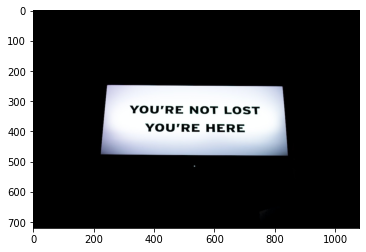

/aiffel/aiffel/ocr_python/image/0000.png
/aiffel/aiffel/ocr_python/image/0001.png
/aiffel/aiffel/ocr_python/image/0002.png
/aiffel/aiffel/ocr_python/image/0003.png
/aiffel/aiffel/ocr_python/image/0004.png
/aiffel/aiffel/ocr_python/image/0005.png


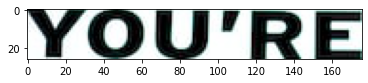

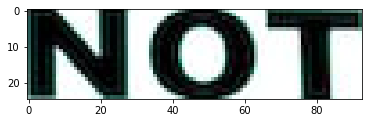

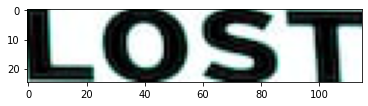

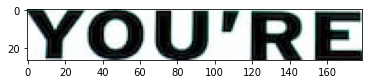

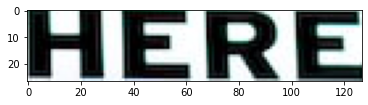

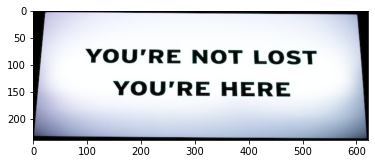

In [20]:
work_dir = os.getenv('HOME')+'/aiffel/ocr_python/image'
img_file_path = work_dir + '/ocr_7.jpeg'
img_bgr = cv2.imread(img_file_path)
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()
cropped_image_path_list = crop_word_regions(img_file_path, work_dir)

def recognize_images(cropped_image_path_list):
    custom_oem_psm_config = r'--oem 3 --psm 7'
    for image_path in cropped_image_path_list:
        image = Image.open(image_path)
        recognized_data = pytesseract.image_to_string(
            image, lang='eng', 
            config=custom_oem_psm_config,
            output_type=Output.DICT)
        img_bgr = cv2.imread(image_path)
        img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
        plt.imshow(img_rgb)
        plt.show()
recognize_images(cropped_image_path_list)

# 3. Conclusion 

#### (1) Google OCR API

영어, 한글이 둘 다 지원되며 빠르고 정확하다.

또한 글씨가 흐릿한 경우에도 잘 읽어낸다.
______________________________________________________________________________________________________________________

#### (2) Keras OCR

한글이 지원되지 않으며, 시간이 상당히 오래 걸린다.

하지만 박스로 먼저 단어 탐지 후 인식한 단어와 연결하여 한눈에 파악하기 쉬운 장점이 있다.
______________________________________________________________________________________________________________________

#### (3) Tesseract OCR

복잡한 사전에서 단어 인식이 힘들고, 의미 단위의 단어 추출이 약하다.

# 4. References

[1] https://lms.aiffel.io/course/382/node/514